In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [ ]:
links = pd.read_csv('https://raw.githubusercontent.com/BheemisettySaiHarsha/PRML_project/main/PRML%20DATASET/links.csv')
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [ ]:
unique_MovieId = links['movieId'].nunique()
print(f"Total unique MovieId's in the dataset are ",unique_MovieId)

Total unique MovieId's in the dataset are  9742


In [ ]:
movies = pd.read_csv('https://raw.githubusercontent.com/BheemisettySaiHarsha/PRML_project/main/PRML%20DATASET/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
tags = pd.read_csv('https://raw.githubusercontent.com/BheemisettySaiHarsha/PRML_project/main/PRML%20DATASET/tags.csv')
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [ ]:
tags.drop('timestamp',axis = 1,inplace = True)
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [ ]:
tags_combined = tags.groupby(['userId', 'movieId'])['tag'].apply(', '.join).reset_index()
tags_combined

,userId,movieId,tag
0,2,60756,"funny, Highly quotable, will ferrell"
1,2,89774,"Boxing story, MMA, Tom Hardy"
2,2,106782,"drugs, Leonardo DiCaprio, Martin Scorsese"
3,7,48516,way too long
4,18,431,"Al Pacino, gangster, mafia"
...,...,...,...
1770,606,6107,World War II
1771,606,7382,for katie
1772,606,7936,austere
1773,610,3265,"gun fu, heroic bloodshed"


In [ ]:
ratings = pd.read_csv('https://raw.githubusercontent.com/BheemisettySaiHarsha/PRML_project/main/PRML%20DATASET/ratings.csv')
ratings.drop('timestamp',axis = 1,inplace = True)
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


 **The below is the pie chart representing the distribution of different ratings.Each slice of the pie represents a specific rating given by user’s and its corresponding percentage.**

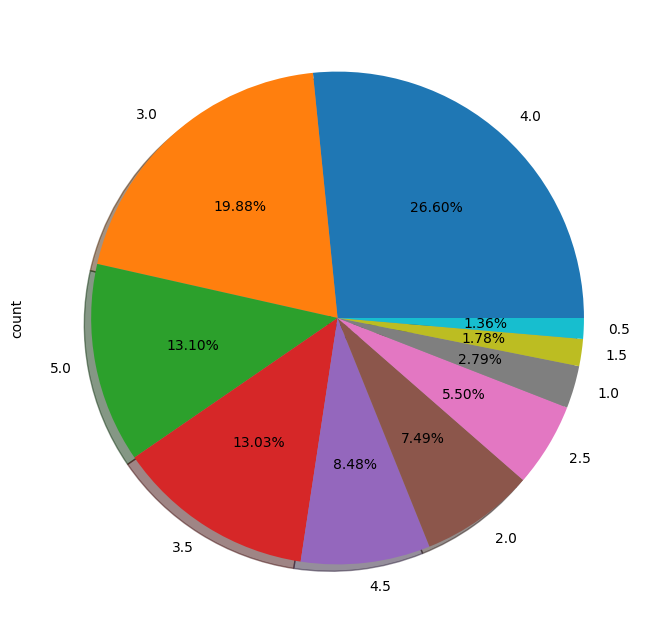

In [ ]:
plt.figure(figsize = [8, 8], clear = True, )
ratings["rating"].value_counts().plot.pie( autopct='%1.2f%%', shadow = True);

**Average Rating of each movie corresponding to its movieId**

In [ ]:

mean_rating = ratings.groupby('movieId')['rating'].mean().reset_index()

mean_rating

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


In [ ]:
unique_userId = ratings['userId'].nunique()
print(f"Total unique userId's in the dataset are ",unique_userId)

Total unique userId's in the dataset are  610


**merging inks and movies on movieId**

In [ ]:
df1 = links.merge(movies,on ='movieId')
df1

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9737,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,6397426,479308.0,Flint (2017),Drama
9740,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


**merging ratings and tags on userId, movieId**

In [ ]:
df2 = pd.merge(ratings, tags, on=['userId', 'movieId'])
df2


,userId,movieId,rating,tag
0,2,60756,5.0,funny
1,2,60756,5.0,Highly quotable
2,2,60756,5.0,will ferrell
3,2,89774,5.0,Boxing story
4,2,89774,5.0,MMA
...,...,...,...,...
3471,606,6107,4.0,World War II
3472,606,7382,4.5,for katie
3473,610,3265,5.0,gun fu
3474,610,3265,5.0,heroic bloodshed


**Combining all tags for a particular movieId**

In [ ]:
# Group the data by userId and movieId, and join the tags together
grouped_df = df2.groupby(['userId', 'movieId', 'rating'])['tag'].apply(', '.join).reset_index()

# Now, grouped_df contains the combined tags for each userId and movieId
grouped_df

,userId,movieId,rating,tag
0,2,60756,5.0,"funny, Highly quotable, will ferrell"
1,2,89774,5.0,"Boxing story, MMA, Tom Hardy"
2,2,106782,5.0,"drugs, Leonardo DiCaprio, Martin Scorsese"
3,7,48516,1.0,way too long
4,18,431,4.0,"Al Pacino, gangster, mafia"
...,...,...,...,...
1630,606,5694,3.0,70mm
1631,606,6107,4.0,World War II
1632,606,7382,4.5,for katie
1633,610,3265,5.0,"gun fu, heroic bloodshed"


In [ ]:
grouped_df.sort_values('movieId')
print(grouped_df['userId'].nunique())

54


**Merging grouped_df,df1 on movieId**

In [ ]:
# Merge the two dataframes on 'movieId'
merged_df = pd.merge(grouped_df, df1, on='movieId', how='left')

# Display the merged dataframe
merged_df


,userId,movieId,rating,tag,imdbId,tmdbId,title,genres
0,2,60756,5.0,"funny, Highly quotable, will ferrell",838283,12133.0,Step Brothers (2008),Comedy
1,2,89774,5.0,"Boxing story, MMA, Tom Hardy",1291584,59440.0,Warrior (2011),Drama
2,2,106782,5.0,"drugs, Leonardo DiCaprio, Martin Scorsese",993846,106646.0,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
3,7,48516,1.0,way too long,407887,1422.0,"Departed, The (2006)",Crime|Drama|Thriller
4,18,431,4.0,"Al Pacino, gangster, mafia",106519,6075.0,Carlito's Way (1993),Crime|Drama
...,...,...,...,...,...,...,...,...
1630,606,5694,3.0,70mm,86361,10805.0,Staying Alive (1983),Comedy|Drama|Musical
1631,606,6107,4.0,World War II,84422,42130.0,Night of the Shooting Stars (Notte di San Lore...,Drama|War
1632,606,7382,4.5,for katie,326977,25300.0,I'm Not Scared (Io non ho paura) (2003),Drama|Mystery|Thriller
1633,610,3265,5.0,"gun fu, heroic bloodshed",104684,11782.0,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller


**Replacing the separator "|" by comma for genres**

In [ ]:
# Convert genres column to strings separated by commas
merged_df['genres'] = merged_df['genres'].apply(lambda x: ','.join(x.split('|')))

# Display the modified dataframe
merged_df


,userId,movieId,rating,tag,imdbId,tmdbId,title,genres
0,2,60756,5.0,"funny, Highly quotable, will ferrell",838283,12133.0,Step Brothers (2008),Comedy
1,2,89774,5.0,"Boxing story, MMA, Tom Hardy",1291584,59440.0,Warrior (2011),Drama
2,2,106782,5.0,"drugs, Leonardo DiCaprio, Martin Scorsese",993846,106646.0,"Wolf of Wall Street, The (2013)","Comedy,Crime,Drama"
3,7,48516,1.0,way too long,407887,1422.0,"Departed, The (2006)","Crime,Drama,Thriller"
4,18,431,4.0,"Al Pacino, gangster, mafia",106519,6075.0,Carlito's Way (1993),"Crime,Drama"
...,...,...,...,...,...,...,...,...
1630,606,5694,3.0,70mm,86361,10805.0,Staying Alive (1983),"Comedy,Drama,Musical"
1631,606,6107,4.0,World War II,84422,42130.0,Night of the Shooting Stars (Notte di San Lore...,"Drama,War"
1632,606,7382,4.5,for katie,326977,25300.0,I'm Not Scared (Io non ho paura) (2003),"Drama,Mystery,Thriller"
1633,610,3265,5.0,"gun fu, heroic bloodshed",104684,11782.0,Hard-Boiled (Lat sau san taam) (1992),"Action,Crime,Drama,Thriller"
